## **[사전 준비] 라이브러리 및 한글 폰트 설치**

(이 코드 셀은 실습 시작 전 맨 처음에 한 번만 실행해 주세요.)


In [1]:
# 필요 라이브러리 설치
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.7 MB/s eta 0:00:0000:01


In [2]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

---


## **문제 1 (난이도: 하): 게임 아이템 뽑기 확률, 정말 10%일까?**

**시나리오:**
어떤 게임 개발사에서 새로운 아이템의 뽑기 확률이 10%로 설정되었다고 주장하고 있습니다. 유저 커뮤니티에서는 "실제 확률은 10%보다 낮은 것 같다"는 의혹이 제기되었습니다. 이를 확인하기 위해 한 유저가 아이템을 200번 뽑았고, 그중 12번 성공했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이항검정(Binomial Test)을 사용하여, 이 유저의 결과(200번 중 12번 성공)가 개발사의 주장(P=0.1)을 기각하고 "확률이 10%보다 낮은 것 같다"는 의혹을 뒷받침할 만큼 통계적으로 유의미한지 검증하세요.


In [4]:
# 문제 설정
n = 200  # 총 시행 횟수
x = 12   # 관찰된 성공 횟수
p = 0.1  # 귀무가설에서의 성공 확률

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 아이템의 실제 뽑기 확률은 10%이다. (p = 0.1)
# H₁ (대립가설): 아이템의 실제 뽑기 확률은 10%보다 낮다. (p < 0.1)

# [작성] 이항검정을 수행하고 p-값을 계산하세요.
# '확률이 더 낮은 것 같다'는 주장을 검증하려면 alternative 인수를 어떻게 설정해야 할까요?
from scipy.stats import binomtest

p_value = binomtest(x, n, p, alternative='less').pvalue

print(f"{n}번 시도 중 {x}번 성공")
print(f"p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
if p_value < alpha:
    print("p-value가 0.05보다 작으므로 귀무가설을 기각 (실제 확률이 10%보다 낮을 가능성이 통계적으로 유의미함)")
else:
    print("p-value가 0.05보다 크므로 귀무가설을 기각할 수 없음 (실제 확률이 10%보다 낮다고 보기 어려움)")

200번 시도 중 12번 성공
p-value: 0.0320
p-value가 0.05보다 작으므로 귀무가설을 기각 (실제 확률이 10%보다 낮을 가능성이 통계적으로 유의미함)


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** Part 1에서 계산된 p-값의 의미를 직접 눈으로 확인해 봅시다. **"만약 개발사의 주장대로 실제 확률이 정말 10%라면"**, 200번 뽑기를 했을 때 성공 횟수가 어떻게 분포하는지 시뮬레이션을 통해 알아보고, 우리가 관찰한 '12번 성공'이 얼마나 희귀한 일인지 확인하세요.


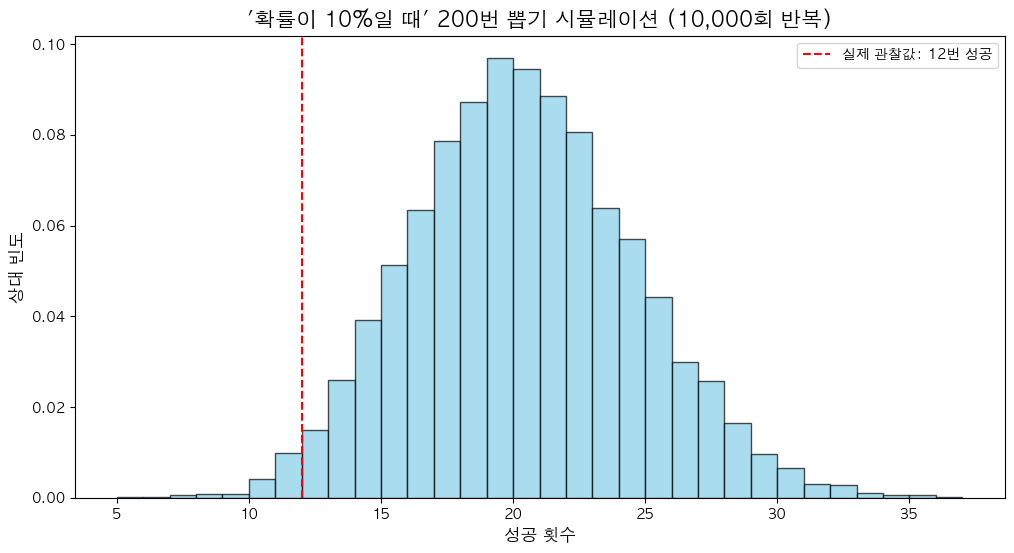

In [19]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 실제 확률 p = 0.1
# 200번 뽑기를 10,000번 반복 수행
num_simulations = 10000

# numpy의 이항분포 랜덤 함수를 사용하여 시뮬레이션 결과를 생성하세요.
simulated_successes = np.random.binomial(n=200, p=0.1, size=num_simulations)

# 2. 시각화
plt.figure(figsize=(12, 6))
# 시뮬레이션 결과(simulated_successes)를 히스토그램으로 그리세요.
plt.hist(simulated_successes, bins=range(min(simulated_successes), max(simulated_successes)+2), 
         density=True, alpha=0.7, color='skyblue', edgecolor='black')

plt.axvline(x=x, color='red', linestyle='--', label=f'실제 관찰값: {x}번 성공')
plt.title("'확률이 10%일 때' 200번 뽑기 시뮬레이션 (10,000회 반복)", fontsize=15)
plt.xlabel("성공 횟수", fontsize=12)
plt.ylabel("상대 빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1. Part 1에서 구한 `p-value`는 Part 2의 시뮬레이션 그래프에서 '관찰된 성공 횟수(예: 12회) 이상(또는 이하)의 값이 나올 확률'에 해당합니다. 즉, 그래프에서 관찰값(12회 성공)보다 극단적인 값들이 차지하는 영역의 비율이 바로 p-value입니다. 이 값은 "귀무가설이 참일 때, 우리가 관찰한 결과와 같거나 더 극단적인 결과가 나올 확률"을 의미합니다.

2. 시뮬레이션 그래프를 보면, '12회 성공'은 전체 시뮬레이션 결과 중에서 매우 드물게 나타나는 구간에 위치해 있습니다. 즉, 개발사의 주장이 맞아서 실제 확률이 10%라면, 200번 중 12회 성공은 거의 일어나지 않는 일(희귀한 사건)임을 알 수 있습니다.

3. 이 시뮬레이션 경험을 바탕으로 "p-값이 작으면 귀무가설을 기각한다"는 규칙을 친구에게 쉽게 설명하자면, "만약 개발사의 말이 맞다면(귀무가설), 우리가 실제로 관찰한 결과처럼 극단적인 일이 일어날 확률이 매우 낮으니, 개발사의 말이 틀렸다고 생각하는 게 더 합리적이야"라고 말할 수 있습니다. 즉, p-값이 작다는 것은 '우리가 관찰한 결과가 우연히 일어날 가능성이 거의 없으니, 기존의 가정을 의심해야 한다'는 뜻입니다.


---


## **문제 2 (난이도: 하): 과자 한 봉지의 중량은 150g이 맞을까?**

**시나리오:**
한 식품 공장에서 생산하는 과자 한 봉지의 목표 중량은 150g입니다. 품질관리팀은 생산 공정이 목표 중량을 잘 맞추고 있는지 확인하기 위해, 생산된 과자 30봉지를 무작위로 추출하여 무게를 측정했습니다. (측정 데이터는 아래 코드에 제공)


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 일표본 t-검정(One-sample t-Test)을 사용하여, 추출된 과자 샘플의 평균 무게가 목표 중량 150g과 통계적으로 유의미한 차이가 있는지 검증하세요.


In [18]:
# 주어진 데이터
np.random.seed(42)
sample_weights = np.random.normal(loc=151.5, scale=2, size=30)
pop_mean = 150 # 목표 중량 (모평균)

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 과자 한 봉지의 평균 무게는 150g이다. (μ = 150)
# H₁ (대립가설): 과자 한 봉지의 평균 무게는 150g이 아니다. (μ ≠ 150)

# [작성] 일표본 t-검정을 수행하여 t-통계량과 p-값을 구하세요.
t_statistic, p_value = ttest_1samp(sample_weights, pop_mean)

print(f"샘플 평균 무게: {np.mean(sample_weights):.2f}g")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
if p_value < alpha:
    print("p-값이 0.05보다 작으므로, 귀무가설을 기각 (과자 평균 무게는 150g과 통계적으로 유의미함)")
else:
    print("p-값이 0.05보다 크므로, 귀무가설을 기각할 수 없음 (과자 평균 무게는 150g과 통계적으로 유의미한 차이가 없음)")

샘플 평균 무게: 151.12g
t-statistic: 3.4193
p-value: 0.0019
p-값이 0.05보다 작으므로, 귀무가설을 기각 (과자 평균 무게는 150g과 통계적으로 유의미함)


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설이 사실일 때, 즉 **"과자 봉지의 평균 무게가 정확히 150g이라면"** 어떤 결과들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 샘플 평균(약 151.5g)이 얼마나 특이한 값인지 직접 확인해 보세요.


/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


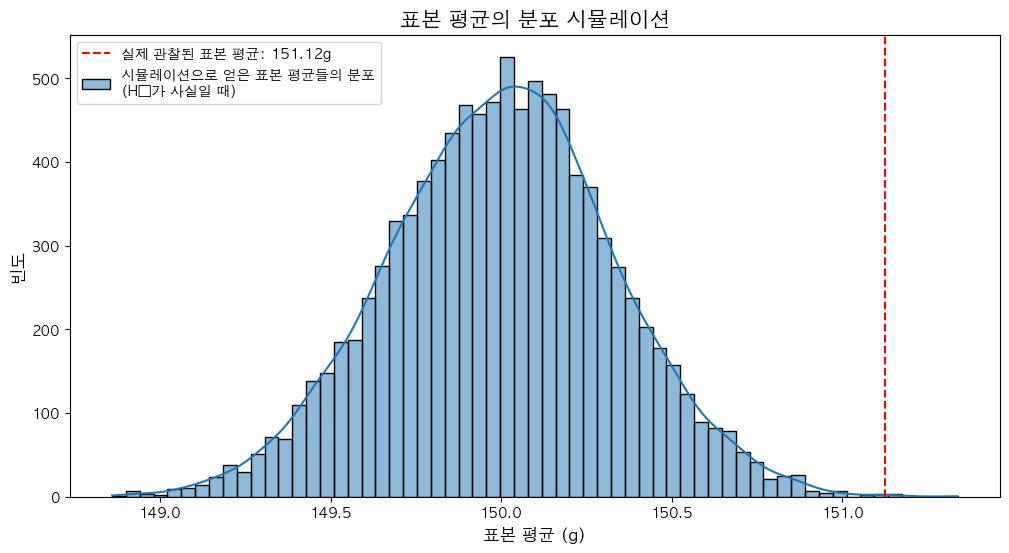

In [7]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 평균(loc) = 150g
# 표준편차는 우리가 가진 샘플의 표준편차를 사용한다고 가정
# 30개짜리 샘플을 10,000번 뽑기
num_simulations = 10000
sample_size = 30
simulated_means = []

# [작성] for 반복문을 사용하여 시뮬레이션을 10,000번 수행하세요.
# 각 반복마다 H₀가 사실인 모집단에서 30개의 샘플을 뽑고, 그 평균을 simulated_means 리스트에 추가하세요.
sample_std = np.std(sample_weights, ddof=1)  # 샘플의 표준편차 사용

for _ in range(num_simulations):
    simulated_sample = np.random.normal(loc=150, scale=sample_std, size=sample_size)
    simulated_mean = np.mean(simulated_sample)
    simulated_means.append(simulated_mean)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_means, kde=True, label='시뮬레이션으로 얻은 표본 평균들의 분포\n(H₀가 사실일 때)')
plt.axvline(x=np.mean(sample_weights), color='red', linestyle='--', label=f'실제 관찰된 표본 평균: {np.mean(sample_weights):.2f}g')
plt.title("표본 평균의 분포 시뮬레이션", fontsize=15)
plt.xlabel("표본 평균 (g)", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  Part 2의 히스토그램은 무엇을 나타내나요? 이 분포의 모양이 정규분포와 비슷한 이유는 무엇일까요? (힌트: 4장에서 배운 개념)
2.  우리가 실제로 관찰한 표본 평균(빨간 점선)은 이 분포에서 흔하게 나타나는 값인가요? Part 1의 p-값과 이 시각적 위치는 어떻게 관련되나요?
3.  만약 p-값이 0.001이었다면, 빨간 점선은 그래프의 어디쯤에 위치할 것으로 예상되나요? 이는 공장 입장에서 어떤 조치를 취해야 함을 시사할까요?


---


## **문제 3 (난이도: 중): 어떤 온라인 학습 방식이 더 효과적일까?**

**시나리오:**
한 교육 기업에서 두 가지 다른 온라인 학습 방식(A, B)을 개발했습니다. 방식 A가 방식 B보다 학생들의 성적 향상에 더 효과적인지 알아보기 위해, 두 그룹의 학생들에게 각각 다른 방식으로 한 달간 학습시킨 후 시험을 보게 했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이표본 t-검정(Two-sample t-Test)을 수행하여 두 학습 방식 간 평균 점수 차이가 통계적으로 유의미한지 확인하세요. (단, t-검정의 기본 가정인 정규성과 등분산성을 먼저 검증해야 합니다.)


In [17]:
# 데이터 생성
np.random.seed(0)
group_a_scores = np.random.normal(loc=85, scale=8, size=50)
group_b_scores = np.random.normal(loc=80, scale=7, size=50)

# [작성] 1. 정규성 검정 (Shapiro-Wilk test)
# H₀: 데이터는 정규분포를 따른다.
# 두 그룹에 대해 각각 정규성 검정을 수행하고 p-값을 출력하세요.
shapiro_a_pvalue = shapiro(group_a_scores).pvalue
shapiro_b_pvalue = shapiro(group_b_scores).pvalue
print(f"A그룹 정규성 검정 p-value: {shapiro_a_pvalue:.4f}")
print(f"B그룹 정규성 검정 p-value: {shapiro_b_pvalue:.4f}")

# [작성] 2. 등분산성 검정 (Levene's test)
# H₀: 두 그룹의 분산은 같다.
# 두 그룹에 대해 등분산성 검정을 수행하고 p-값을 출력하세요.
levene_pvalue = levene(group_a_scores, group_b_scores).pvalue
print(f"등분산성 검정 p-value: {levene_pvalue:.4f}")

# [작성] 3. 이표본 t-검정
# H₀: 두 그룹의 평균은 같다.
# H₁: 두 그룹의 평균은 다르다.
# 등분산성 가정을 만족했는지 여부에 따라 equal_var 인수를 설정하여 t-검정을 수행하세요.
equal_var = True if levene_pvalue > 0.05 else False
t_statistic, p_value = ttest_ind(group_a_scores, group_b_scores, equal_var=equal_var)
print(f"\n이표본 t-검정 t-statistic: {t_statistic:.4f}")
print(f"이표본 t-검정 p-value: {p_value:.4f}")

A그룹 정규성 검정 p-value: 0.8766
B그룹 정규성 검정 p-value: 0.8366
등분산성 검정 p-value: 0.0150

이표본 t-검정 t-statistic: 4.0426
이표본 t-검정 p-value: 0.0001


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"두 학습 방식의 효과가 완전히 똑같다면"** 어떤 결과가 나타날지 시뮬레이션으로 확인해봅시다. 두 그룹의 점수 차이가 우연히 발생할 수 있는 범위를 눈으로 보고, 우리가 관찰한 실제 점수 차이가 그 범위 안에 있는지 확인해 보세요.


/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


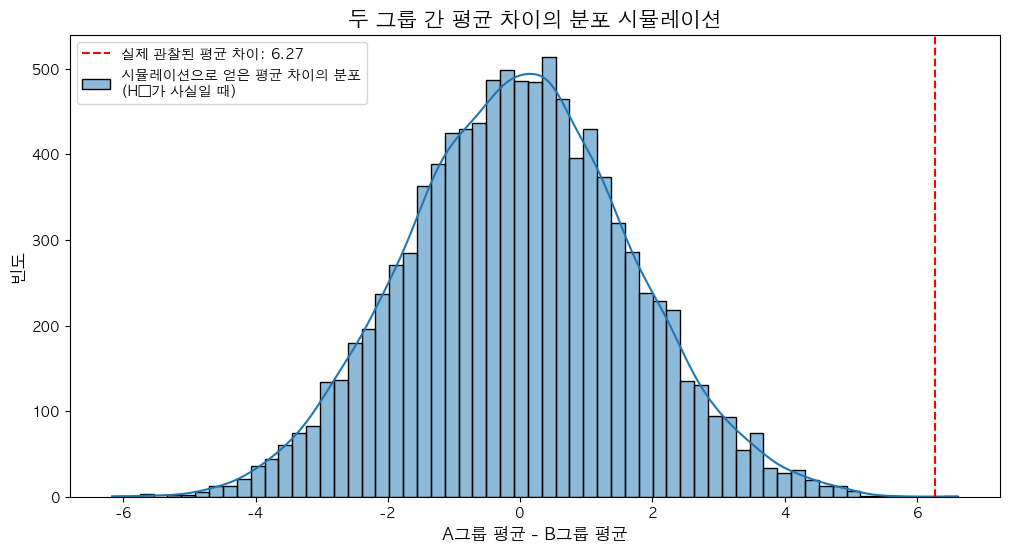

In [11]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 두 그룹의 평균은 같다.
# 두 그룹의 모든 데이터를 합쳐서 하나의 거대한 모집단(H₀)을 만듭니다.
combined_scores = np.concatenate([group_a_scores, group_b_scores])
num_simulations = 10000
simulated_diffs = []

# for 반복문을 사용하여 시뮬레이션을 10,000번 수행합니다.
# 각 반복마다, 합쳐진 데이터(combined_scores)에서 비복원추출로 50개(가상 A그룹)와 나머지 50개(가상 B그룹)를 뽑아
# 두 그룹의 평균 차이를 계산하고 simulated_diffs 리스트에 추가합니다.
for _ in range(num_simulations):
    # combined_scores에서 50개를 비복원추출하여 가상 A그룹을 만듭니다.
    a_sample = np.random.choice(combined_scores, size=50, replace=False)
    # 남은 데이터(총 100개 중 a_sample에 없는 50개)로 가상 B그룹을 만듭니다.
    b_sample = np.setdiff1d(combined_scores, a_sample, assume_unique=False)
    # 두 그룹의 평균 차이를 계산하여 리스트에 추가합니다.
    simulated_diffs.append(np.mean(a_sample) - np.mean(b_sample))

# 2. 시각화
observed_diff = np.mean(group_a_scores) - np.mean(group_b_scores)
plt.figure(figsize=(12, 6))
sns.histplot(simulated_diffs, kde=True, label='시뮬레이션으로 얻은 평균 차이의 분포\n(H₀가 사실일 때)')
plt.axvline(x=observed_diff, color='red', linestyle='--', label=f'실제 관찰된 평균 차이: {observed_diff:.2f}')
plt.title("두 그룹 간 평균 차이의 분포 시뮬레이션", fontsize=15)
plt.xlabel("A그룹 평균 - B그룹 평균", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  정규성 검정과 등분산성 검정의 p-값은 각각 어떻게 해석해야 하나요? 이 결과는 우리가 이표본 t-검정을 사용하는 데 문제가 없음을 보여주나요?
2.  Part 2의 히스토그램 중심이 0에 가까운 이유는 무엇일까요?
3.  실제 관찰된 평균 차이(빨간 점선)는 "두 방식의 효과가 같다"고 가정했을 때 우연히 나타날 수 있는 범위 안에 있나요, 아니면 그 범위를 벗어나나요? 이 시각적 판단과 Part 1의 p-값은 어떤 관계가 있나요?


---


## **문제 4 (난이도: 중): 연령대별로 선호하는 영화 장르가 다를까?**

**시나리오:**
한 영화관에서 고객의 연령대(20대, 30대, 40대)에 따라 선호하는 영화 장르(액션, 로맨스)에 차이가 있는지 궁금해졌습니다. 이를 알아보기 위해 300명의 고객을 대상으로 설문조사를 진행하여 아래와 같은 분할표를 얻었습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 카이제곱 독립성 검정(Chi-squared Test of Independence)을 사용하여 '연령대'와 '선호 장르'라는 두 범주형 변수 사이에 연관성이 있는지 검증하세요.


In [16]:
# 데이터 생성 (관측 빈도 분할표)
data = {'액션': [70, 50, 30],
        '로맨스': [30, 60, 60]}
observed = pd.DataFrame(data, index=['20대', '30대', '40대'])
print("관측 빈도 (Observed Frequencies):")
print(observed)

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 연령대와 선호하는 영화 장르는 서로 독립이다. 즉, 연령대에 따라 선호 장르의 분포가 달라지지 않는다.
# H₁ (대립가설): 연령대와 선호하는 영화 장르는 서로 독립이 아니다. 즉, 연령대에 따라 선호 장르의 분포가 달라진다.

# [작성] 카이제곱 독립성 검정을 수행하고 카이제곱 통계량, p-값, 기대 빈도를 구하세요.
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\n기대 빈도 (Expected Frequencies):")
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))

관측 빈도 (Observed Frequencies):
     액션  로맨스
20대  70   30
30대  50   60
40대  30   60

Chi-squared statistic: 26.9091
p-value: 0.0000
Degrees of Freedom: 2

기대 빈도 (Expected Frequencies):
       액션   로맨스
20대  50.0  50.0
30대  55.0  55.0
40대  45.0  45.0


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"연령대와 선호 장르가 서로 아무 관련이 없다면(독립이라면)"** 어떤 분할표들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 시뮬레이션을 통해 얻은 수많은 가상의 카이제곱 통계량 분포와 우리가 실제로 관찰한 카이제곱 통계량을 비교해 보세요.


/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


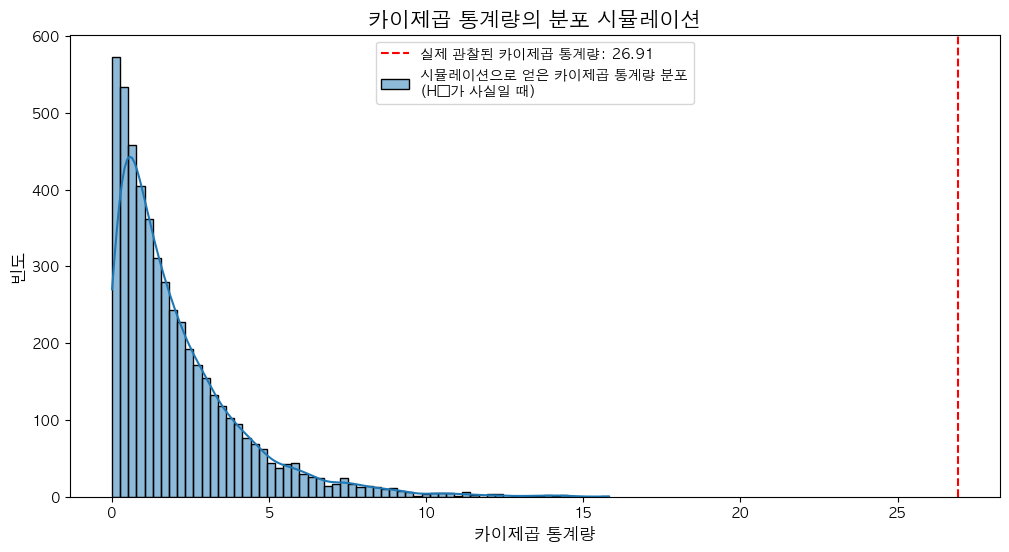

In [13]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 두 변수는 독립이다.
# 전체 비율을 기반으로 가상 데이터를 생성합니다.
total_people = observed.sum().sum()
p_genre = observed.sum(axis=0) / total_people # 장르별 전체 비율
p_age = observed.sum(axis=1) / total_people   # 연령대별 전체 비율
num_simulations = 5000
simulated_chi2_stats = []

# for 반복문을 사용하여 시뮬레이션을 5,000번 수행합니다.
# 각 반복마다, 300명의 가상 고객에게 연령대와 장르를 '독립적으로' 할당한 후,
# 가상 분할표를 만들고 카이제곱 통계량을 계산하여 simulated_chi2_stats 리스트에 추가합니다.
for _ in range(num_simulations):
    # 300명의 연령대와 장르를 각각 독립적으로 무작위로 할당
    simulated_ages = np.random.choice(observed.index, size=total_people, p=p_age)
    simulated_genres = np.random.choice(observed.columns, size=total_people, p=p_genre)
    # 가상 분할표 생성
    simulated_table = pd.crosstab(simulated_ages, simulated_genres)
    # 실제 분할표와 동일한 인덱스/컬럼 순서로 맞추기 (혹시 빠진 값이 있을 경우 0으로 채움)
    simulated_table = simulated_table.reindex(index=observed.index, columns=observed.columns, fill_value=0)
    # 카이제곱 통계량 계산
    chi2_sim, _, _, _ = stats.chi2_contingency(simulated_table)
    simulated_chi2_stats.append(chi2_sim)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_chi2_stats, kde=True, label='시뮬레이션으로 얻은 카이제곱 통계량 분포\n(H₀가 사실일 때)')
plt.axvline(x=chi2, color='red', linestyle='--', label=f'실제 관찰된 카이제곱 통계량: {chi2:.2f}')
plt.title("카이제곱 통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("카이제곱 통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  '기대 빈도'는 어떤 의미를 가지며, '관측 빈도'와의 차이가 클수록 카이제곱 통계량은 어떻게 변할까요?
2.  Part 2의 히스토그램은 어떤 분포를 시각화한 것인가요? 실제 관찰된 카이제곱 통계량(빨간 점선)은 이 분포에서 흔한 값인가요, 아니면 극단적인 값인가요?
3.  유의수준 0.05에서, 연령대와 선호하는 영화 장르 사이에 통계적으로 유의미한 연관성이 있다고 결론 내릴 수 있습니까? 그 이유는 무엇인가요?


---


## **문제 5 (난이도: 상): 어떤 신규 비료가 가장 효과적일까?**

**시나리오:**
한 농업 연구소에서 새로 개발한 비료 3종류(A, B, C)의 생산량 증대 효과를 비교하고자 합니다. 동일한 조건의 밭 30개를 준비하여, 각각 10개씩 비료 A, B, C를 투여한 후 수확량을 측정했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:**

1.  분산분석(ANOVA)을 사용하여 세 비료 간 수확량 평균에 유의미한 차이가 있는지 검증하세요.
2.  만약 ANOVA 검정 결과가 유의미하다면, 어떤 비료가 다른 비료와 차이를 보이는지 확인하기 위해 사후분석(Post-hoc test)인 **Tukey's HSD 검정**을 수행하고 결과를 해석하세요.


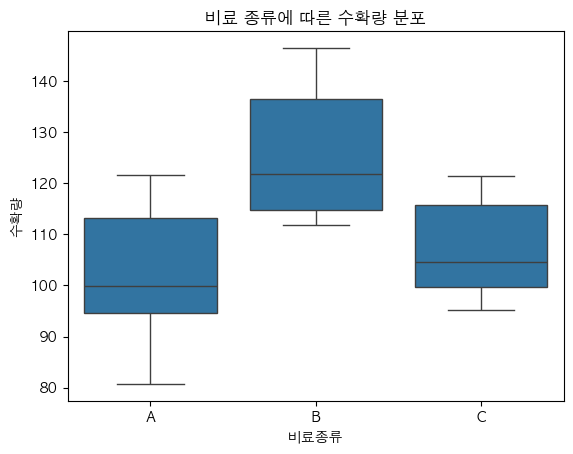

ANOVA F-statistic: 10.3455
ANOVA p-value: 0.0005

Tukey's HSD 사후분석 결과:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  23.6754 0.0006  10.0402 37.3106   True
     A      C   4.8429 0.6569  -8.7923 18.4781  False
     B      C -18.8325 0.0054 -32.4677 -5.1972   True
-----------------------------------------------------


In [15]:
# 데이터 생성
np.random.seed(123)
fertilizer_a = np.random.normal(loc=105, scale=10, size=10)
fertilizer_b = np.random.normal(loc=120, scale=12, size=10)
fertilizer_c = np.random.normal(loc=108, scale=9, size=10)

# 데이터프레임으로 변환 (사후분석을 위해)
df = pd.DataFrame({'수확량': np.concatenate([fertilizer_a, fertilizer_b, fertilizer_c]),
                   '비료종류': ['A']*10 + ['B']*10 + ['C']*10})

# 1. 시각화 (데이터 탐색)
sns.boxplot(x='비료종류', y='수확량', data=df)
plt.title('비료 종류에 따른 수확량 분포')
plt.show()

# [작성] 2. 분산분석 (ANOVA)
# H₀: 세 비료의 평균 수확량은 모두 같다.
# H₁: 적어도 하나 이상의 비료 평균 수확량은 다르다.
# 세 그룹에 대해 ANOVA를 수행하고 F-통계량과 p-값을 구하세요.
f_statistic, p_value = f_oneway(fertilizer_a, fertilizer_b, fertilizer_c)
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# [작성] 3. 사후분석 (Tukey's HSD)
# ANOVA의 p-값이 유의수준 0.05보다 작을 경우에만 사후분석을 수행하는 코드를 작성하세요.
if p_value < 0.05:
    # 여기에 Tukey's HSD 검정 코드를 작성하고 결과를 출력하세요.
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result = pairwise_tukeyhsd(endog=df['수확량'], groups=df['비료종류'], alpha=0.05)
    print("\nTukey's HSD 사후분석 결과:")
    print(tukey_result)
else:
    print("\nANOVA 결과가 유의미하지 않으므로 사후분석을 수행하지 않습니다.")

### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** ANOVA의 귀무가설, 즉 **"세 비료의 효과가 완전히 똑같다면"** 어떤 F-통계량 값들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 F-통계량이 얼마나 극단적인 값인지 직접 확인해 보세요.


/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


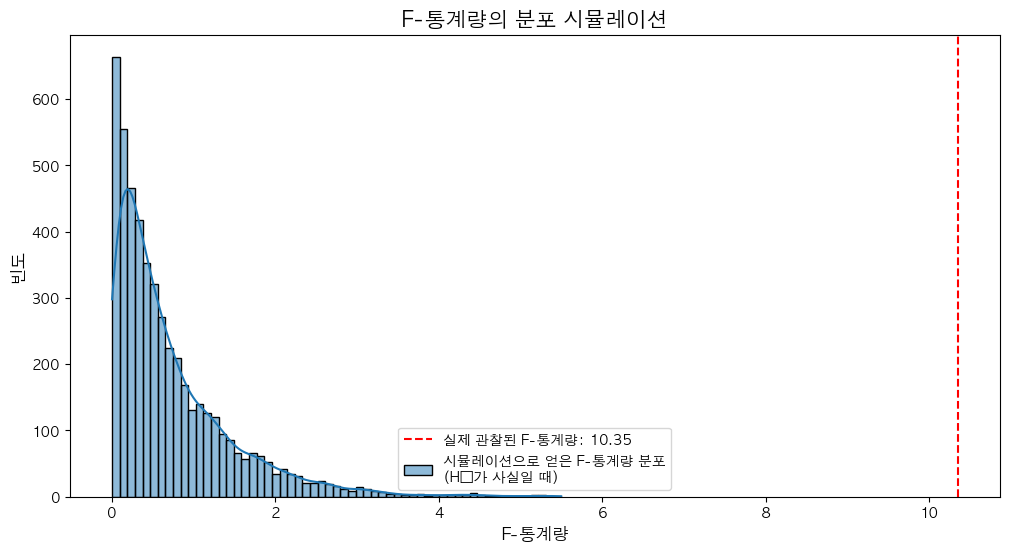

In [20]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 세 그룹의 평균은 모두 같다.
# 모든 데이터를 합쳐서 하나의 거대한 모집단(H₀)을 만들고, 그 평균과 표준편차를 구합니다.
combined_harvest = df['수확량']
grand_mean = combined_harvest.mean()
grand_std = combined_harvest.std()
num_simulations = 5000
simulated_f_stats = []

# for 반복문을 사용하여 시뮬레이션을 5,000번 수행합니다.
# 각 반복마다, H₀ 모집단에서 10개씩 3개의 가상 그룹을 무작위로 샘플링하고,
# 이 가상 그룹들로 ANOVA를 수행하여 F-통계량을 계산하여 simulated_f_stats 리스트에 추가합니다.
for _ in range(num_simulations):
    # H₀ 모집단에서 10개씩 3개의 그룹을 비복원추출로 샘플링
    sample1 = np.random.choice(combined_harvest, size=10, replace=False)
    sample2 = np.random.choice(combined_harvest, size=10, replace=False)
    sample3 = np.random.choice(combined_harvest, size=10, replace=False)
    # 각 그룹에 대해 ANOVA 수행
    f_stat, _ = f_oneway(sample1, sample2, sample3)
    simulated_f_stats.append(f_stat)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_f_stats, kde=True, label='시뮬레이션으로 얻은 F-통계량 분포\n(H₀가 사실일 때)')
plt.axvline(x=f_statistic, color='red', linestyle='--', label=f'실제 관찰된 F-통계량: {f_statistic:.2f}')
plt.title("F-통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("F-통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  ANOVA 검정의 p-값을 통해 어떤 결론을 내릴 수 있나요? 이 결과는 "세 비료가 모두 동일한 효과를 가진다"는 것을 의미하나요, 아니면 "적어도 하나는 다르다"는 것을 의미하나요?
2.  Tukey's HSD 결과표의 `reject` 열을 보세요. `True`로 표시된 조합은 무엇이며, 이는 무엇을 의미하나요? `meandiff` 열의 값은 어떤 정보를 주나요?
3.  이 모든 분석 결과를 종합하여, 연구소에 어떤 비료를 추천하고 그 이유는 무엇인지 비즈니스 관점에서 설명해 보세요.
